# Nutrition Paradox: A Global View on Obesity and Malnutrition

In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import requests
import pandas as pd

# Define API URLs
url_adult_obesity = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
url_child_obesity = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
url_adult_underweight = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
url_child_thinness = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

# Fetch and convert each to DataFrame
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return pd.DataFrame(response.json().get('value', []))
    else:
        print(f"Failed to retrieve data from {url} (status code {response.status_code})")
        return pd.DataFrame()  # Return empty DataFrame on failure

# Create individual DataFrames
adult_obesity_df = fetch_data(url_adult_obesity)
child_obesity_df = fetch_data(url_child_obesity)
adult_underweight_df = fetch_data(url_adult_underweight)
child_thinness_df = fetch_data(url_child_thinness)

In [5]:
adult_obesity_df.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,257,NCD_BMI_30C,COUNTRY,KHM,WPR,YEAR,Western Pacific,SEX,2001,SEX_BTSX,...,None,1.0 [0.8-1.3],0.98170,0.75674,1.27487,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00
1,349,NCD_BMI_30C,COUNTRY,IRN,EMR,YEAR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,None,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
2,807,NCD_BMI_30C,COUNTRY,TJK,EUR,YEAR,Europe,SEX,1995,SEX_FMLE,...,None,7.9 [5.8-10.4],7.90484,5.78327,10.38715,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00
3,1049,NCD_BMI_30C,COUNTRY,WSM,WPR,YEAR,Western Pacific,SEX,2003,SEX_BTSX,...,None,46.6 [44.6-48.7],46.62329,44.61686,48.69747,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00
4,1196,NCD_BMI_30C,COUNTRY,NIU,WPR,YEAR,Western Pacific,SEX,2000,SEX_BTSX,...,None,54.6 [49.4-59.8],54.64320,49.43577,59.77076,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00


In [6]:
# Add 'age_group' column
adult_obesity_df['age_group'] = 'Adult'
adult_underweight_df['age_group'] = 'Adult'
child_obesity_df['age_group'] = 'Child/Adolescent'
child_thinness_df['age_group'] = 'Child/Adolescent'

In [7]:
child_obesity_df.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,169,NCD_BMI_PLUS2C,COUNTRY,URY,YEAR,AMR,Americas,SEX,2014,SEX_BTSX,...,16.6 [14.1-19.3],16.59945,14.13963,19.26034,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,Child/Adolescent
1,541,NCD_BMI_PLUS2C,COUNTRY,AND,YEAR,EUR,Europe,SEX,1993,SEX_MLE,...,6.6 [1.7-15.5],6.57347,1.65166,15.45051,None,2024-02-29T16:06:41.017+01:00,1993,1993-01-01T00:00:00+01:00,1993-12-31T00:00:00+01:00,Child/Adolescent
2,565,NCD_BMI_PLUS2C,COUNTRY,DOM,YEAR,AMR,Americas,SEX,1995,SEX_FMLE,...,5.2 [1.5-11.9],5.23866,1.45374,11.88873,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00,Child/Adolescent
3,642,NCD_BMI_PLUS2C,COUNTRY,ATG,YEAR,AMR,Americas,SEX,1997,SEX_FMLE,...,11.4 [5.2-19.7],11.39469,5.24510,19.66206,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00,Child/Adolescent
4,661,NCD_BMI_PLUS2C,COUNTRY,TKL,YEAR,WPR,Western Pacific,SEX,2011,SEX_FMLE,...,19.8 [11.9-29.1],19.77265,11.85124,29.14295,None,2024-02-29T16:06:41.017+01:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00,Child/Adolescent


In [8]:
# Combine obesity-related datasets
df_obesity = pd.concat([adult_obesity_df, child_obesity_df], ignore_index=True)

# Combine malnutrition-related datasets
df_malnutrition = pd.concat([adult_underweight_df, child_thinness_df], ignore_index=True)

In [9]:
df_malnutrition.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,53,NCD_BMI_18C,COUNTRY,GAB,YEAR,AFR,Africa,SEX,SEX_FMLE,2021,...,5.8 [4.0-8.1],5.79511,3.97204,8.07702,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Adult
1,404,NCD_BMI_18C,COUNTRY,TUV,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2001,...,0.9 [0.4-1.9],0.93657,0.36515,1.85929,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,Adult
2,1627,NCD_BMI_18C,COUNTRY,GHA,YEAR,AFR,Africa,SEX,SEX_MLE,2002,...,13.2 [10.0-16.7],13.20428,10.04854,16.71203,None,2024-02-29T16:06:41.017+01:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00,Adult
3,1997,NCD_BMI_18C,COUNTRY,TCD,YEAR,AFR,Africa,SEX,SEX_BTSX,1990,...,23.2 [17.8-29.0],23.20135,17.80808,28.99020,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00,Adult
4,2197,NCD_BMI_18C,COUNTRY,MNG,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2017,...,3.1 [2.4-3.8],3.09065,2.42823,3.84215,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,Adult


In [10]:
# Filter obesity dataset
df_obesity_filtered = df_obesity[
    (df_obesity['TimeDim'] >= 2012) & (df_obesity['TimeDim'] <= 2022)
]

# Filter malnutrition dataset
df_malnutrition_filtered = df_malnutrition[
    (df_malnutrition['TimeDim'] >= 2012) & (df_malnutrition['TimeDim'] <= 2022)
]

In [11]:
df_obesity_filtered.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
1,349,NCD_BMI_30C,COUNTRY,IRN,EMR,YEAR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult
8,4742,NCD_BMI_30C,COUNTRY,IRQ,EMR,YEAR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,28.3 [23.1-33.8],28.33553,23.08959,33.81534,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult
14,6288,NCD_BMI_30C,COUNTRY,GRL,EUR,YEAR,Europe,SEX,2014,SEX_FMLE,...,27.9 [24.9-31.2],27.94870,24.92477,31.21326,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,Adult
16,7503,NCD_BMI_30C,COUNTRY,ARM,EUR,YEAR,Europe,SEX,2019,SEX_FMLE,...,31.9 [28.2-35.6],31.89322,28.16068,35.57493,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Adult
17,8532,NCD_BMI_30C,COUNTRY,MLT,EUR,YEAR,Europe,SEX,2018,SEX_BTSX,...,33.7 [29.9-37.5],33.69421,29.90581,37.47086,None,2024-02-29T16:06:41.017+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,Adult


In [12]:
# Define columns to retain
columns_to_keep = [
    'ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High',
    'NumericValue', 'SpatialDim', 'age_group'
]

# Define rename mapping
rename_columns = {
    'ParentLocation': 'Region',
    'Dim1': 'Gender',
    'TimeDim': 'Year',
    'Low': 'LowerBound',
    'High': 'UpperBound',
    'NumericValue': 'Mean_Estimate',
    'SpatialDim': 'Country'
}

# Keep and rename columns for obesity
df_obesity_filtered = df_obesity_filtered[columns_to_keep].rename(columns=rename_columns)

# Keep and rename columns for malnutrition
df_malnutrition_filtered = df_malnutrition_filtered[columns_to_keep].rename(columns=rename_columns)

# Standardize Gender values
gender_map = {
    'SEX_BTSX': 'Both',
    'SEX_MLE': 'Male',
    'SEX_FMLE': 'Female'
}

df_obesity_filtered['Gender'] = df_obesity_filtered['Gender'].map(gender_map)
df_malnutrition_filtered['Gender'] = df_malnutrition_filtered['Gender'].map(gender_map)

In [13]:
df_malnutrition_filtered.tail()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group
83147,Americas,Female,2013,2.79550,5.71434,4.14069,HTI,Child/Adolescent
83149,Europe,Both,2018,5.42817,10.21840,7.57499,TJK,Child/Adolescent
83150,Western Pacific,Both,2016,0.62172,3.50706,1.70365,PNG,Child/Adolescent
83156,Western Pacific,Female,2020,0.06415,2.81018,0.73407,WSM,Child/Adolescent
83159,Europe,Male,2018,0.46517,7.30748,2.54279,ISL,Child/Adolescent


In [14]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pycountry

# Custom mapping for codes not covered by ISO Alpha-3
special_country_codes = {
    'GLOBAL': 'Global',
    'AFR': 'Africa',
    'AMR': 'Americas Region',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'WB_UMI': 'Upper Middle Income',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income'
}

# Function to convert ISO Alpha-3 codes to country names
def convert_country_code(code):
    if code in special_country_codes:
        return special_country_codes[code]
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return code  # fallback to original if no match

In [16]:
df_obesity_filtered['Country'] = df_obesity_filtered['Country'].apply(convert_country_code)
df_malnutrition_filtered['Country'] = df_malnutrition_filtered['Country'].apply(convert_country_code)

In [17]:
# Calculate CI_Width for both datasets
df_obesity_filtered['CI_Width'] = df_obesity_filtered['UpperBound'] - df_obesity_filtered['LowerBound']
df_malnutrition_filtered['CI_Width'] = df_malnutrition_filtered['UpperBound'] - df_malnutrition_filtered['LowerBound']

# Add obesity_level column
def classify_obesity(value):
    if value >= 30:
        return 'High'
    elif 25 <= value < 30:
        return 'Moderate'
    else:
        return 'Low'

df_obesity_filtered['obesity_level'] = df_obesity_filtered['Mean_Estimate'].apply(classify_obesity)

# Add malnutrition_level column
def classify_malnutrition(value):
    if value >= 20:
        return 'High'
    elif 10 <= value < 20:
        return 'Moderate'
    else:
        return 'Low'

df_malnutrition_filtered['malnutrition_level'] = df_malnutrition_filtered['Mean_Estimate'].apply(classify_malnutrition)

In [18]:
print(df_obesity_filtered.columns.tolist())

['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate', 'Country', 'age_group', 'CI_Width', 'obesity_level']


In [19]:
print(df_malnutrition_filtered.columns.tolist())

['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate', 'Country', 'age_group', 'CI_Width', 'malnutrition_level']


In [20]:
df_malnutrition_filtered.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
0,Africa,Female,2021,3.97204,8.07702,5.79511,Gabon,Adult,4.10498,Low
4,Western Pacific,Both,2017,2.42823,3.84215,3.09065,Mongolia,Adult,1.41392,Low
5,Africa,Female,2016,6.65567,10.25312,8.37172,Sierra Leone,Adult,3.59745,Low
7,None,Both,2021,12.24232,14.44287,13.33635,South-East Asia Region,Adult,2.20055,Moderate
9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.20807,Qatar,Adult,2.26298,Low


In [21]:
# Check the shape of the final dataframes
print("Obesity Data Shape:", df_obesity_filtered.shape)
print("Malnutrition Data Shape:", df_malnutrition_filtered.shape)

Obesity Data Shape: (27720, 10)
Malnutrition Data Shape: (27720, 10)


In [22]:
# View Column Names and Data Types
print("Obesity Columns and Types:")
print(df_obesity_filtered.dtypes)

print("\nMalnutrition Columns and Types:")
print(df_malnutrition_filtered.dtypes)

Obesity Columns and Types:
Region            object
Gender            object
Year               int64
LowerBound       float64
UpperBound       float64
Mean_Estimate    float64
Country           object
age_group         object
CI_Width         float64
obesity_level     object
dtype: object

Malnutrition Columns and Types:
Region                 object
Gender                 object
Year                    int64
LowerBound            float64
UpperBound            float64
Mean_Estimate         float64
Country                object
age_group              object
CI_Width              float64
malnutrition_level     object
dtype: object


In [23]:
# Check missing values
print("Missing Values in Obesity:")
print(df_obesity_filtered.isnull().sum())

print("Missing Values in Malnutrition:")
print(df_malnutrition_filtered.isnull().sum())

Missing Values in Obesity:
Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64
Missing Values in Malnutrition:
Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
age_group                0
CI_Width                 0
malnutrition_level       0
dtype: int64


In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


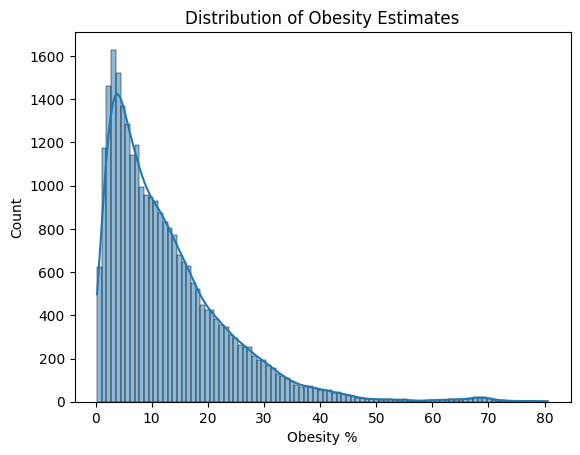

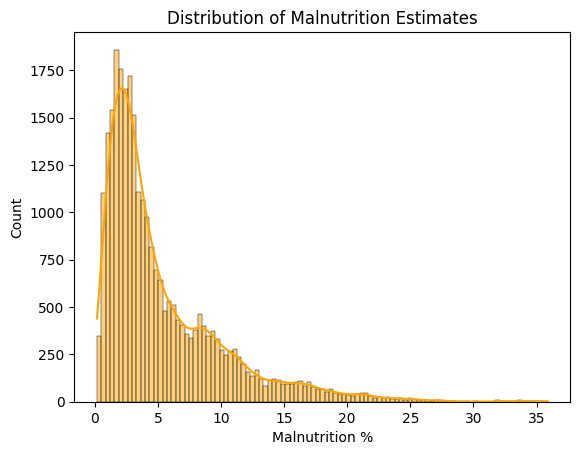

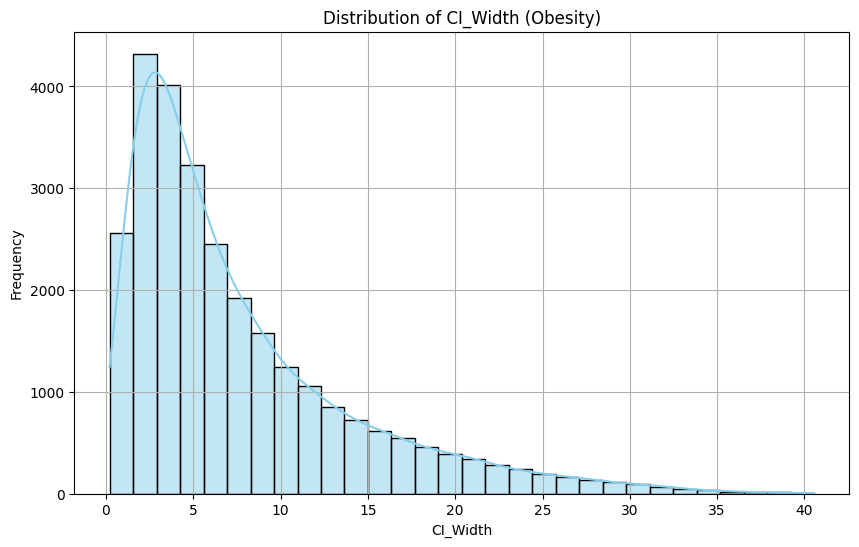

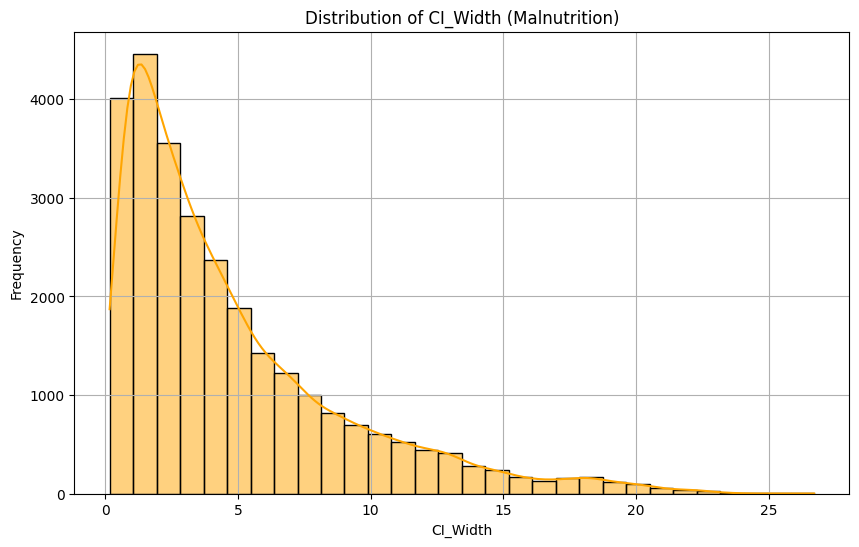

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Mean_Estimate
sns.histplot(df_obesity_filtered['Mean_Estimate'], kde=True)
plt.title("Distribution of Obesity Estimates")
plt.xlabel("Obesity %")
plt.show()

sns.histplot(df_malnutrition_filtered['Mean_Estimate'], kde=True, color="orange")
plt.title("Distribution of Malnutrition Estimates")
plt.xlabel("Malnutrition %")
plt.show()

# Histogram to see the frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_obesity_filtered['CI_Width'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of CI_Width (Obesity)')
plt.xlabel('CI_Width')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_malnutrition_filtered['CI_Width'], bins=30, kde=True, color='orange')
plt.title('Distribution of CI_Width (Malnutrition)')
plt.xlabel('CI_Width')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



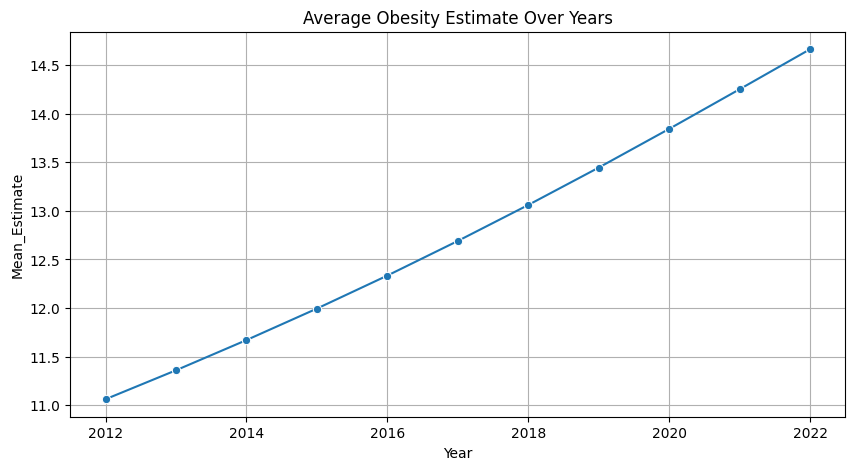

In [26]:
# Average Mean_Estimate per Year
trend_year = df_obesity_filtered.groupby('Year')['Mean_Estimate'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=trend_year, x='Year', y='Mean_Estimate', marker='o')
plt.title('Average Obesity Estimate Over Years')
plt.xlabel('Year')
plt.ylabel('Mean_Estimate')
plt.grid(True)
plt.show()

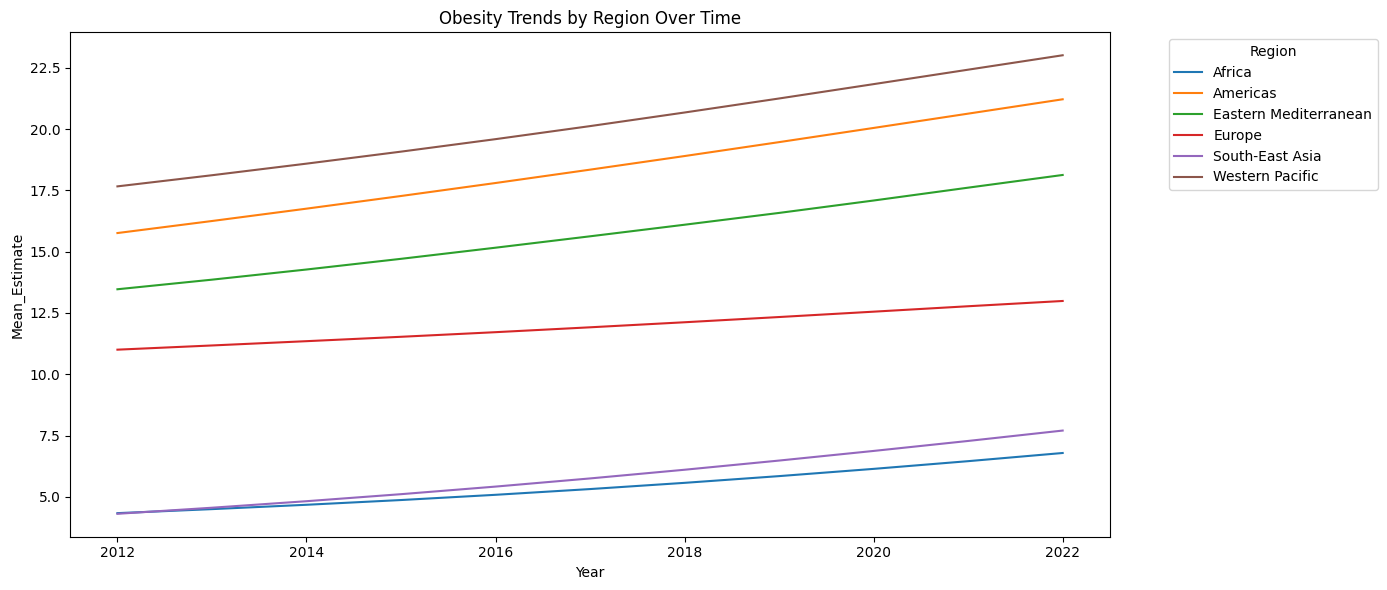

In [27]:
# Group by Year and Region
region_trend = df_obesity_filtered.groupby(['Year', 'Region'])['Mean_Estimate'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=region_trend, x='Year', y='Mean_Estimate', hue='Region')
plt.title('Obesity Trends by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Mean_Estimate')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

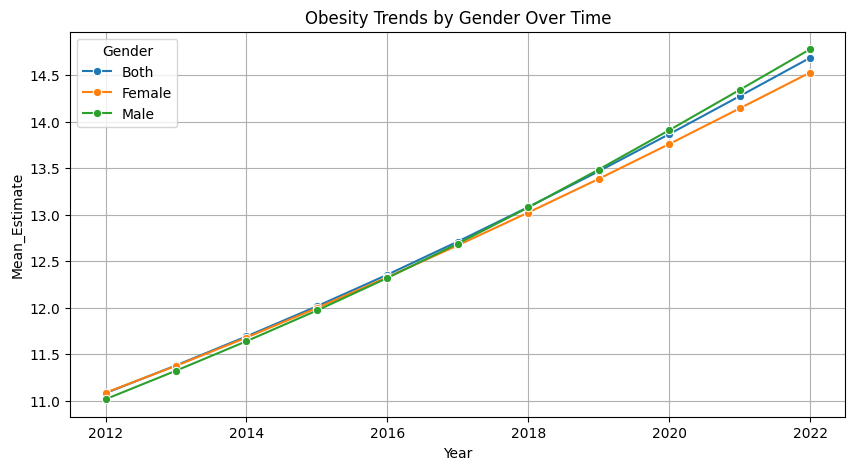

In [28]:
# Group by Year and Gender
gender_trend = df_obesity_filtered.groupby(['Year', 'Gender'])['Mean_Estimate'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=gender_trend, x='Year', y='Mean_Estimate', hue='Gender', marker='o')
plt.title('Obesity Trends by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Mean_Estimate')
plt.grid(True)
plt.show()

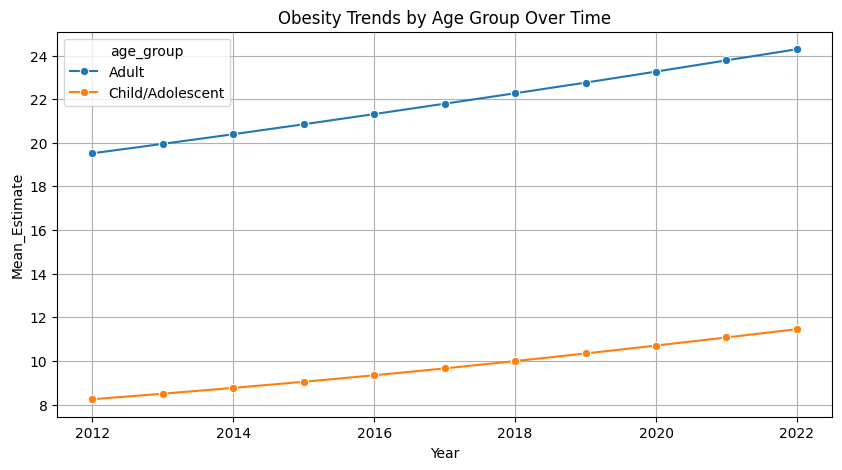

In [29]:
# Group by Year and Age Group
age_trend = df_obesity_filtered.groupby(['Year', 'age_group'])['Mean_Estimate'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=age_trend, x='Year', y='Mean_Estimate', hue='age_group', marker='o')
plt.title('Obesity Trends by Age Group Over Time')
plt.xlabel('Year')
plt.ylabel('Mean_Estimate')
plt.grid(True)
plt.show()

In [30]:
# Prepare a Combined Dataset for comparing obesity vs malnutrition distributions

# Add a 'Category' column to distinguish between the two
df_obesity_filtered['Category'] = 'Obesity'
df_malnutrition_filtered['Category'] = 'Malnutrition'

# Combine the two datasets
df_combined = pd.concat([df_obesity_filtered, df_malnutrition_filtered], ignore_index=True)

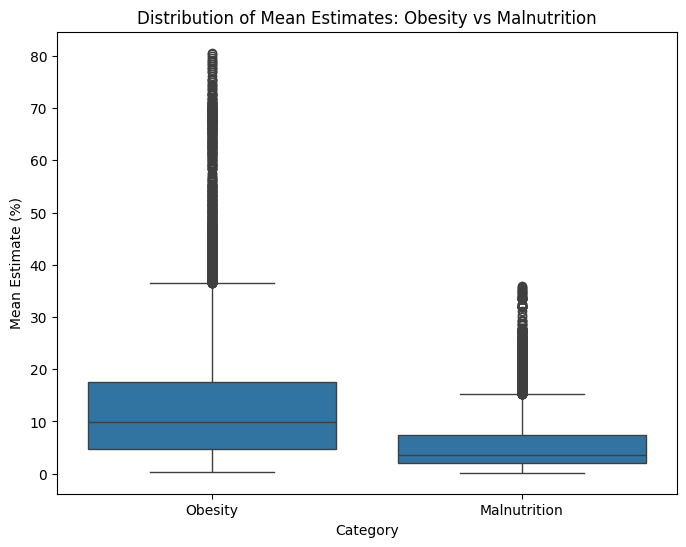

In [31]:
# Box Plot: Mean_Estimate Distribution

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='Category', y='Mean_Estimate')
plt.title('Distribution of Mean Estimates: Obesity vs Malnutrition')
plt.ylabel('Mean Estimate (%)')
plt.show()

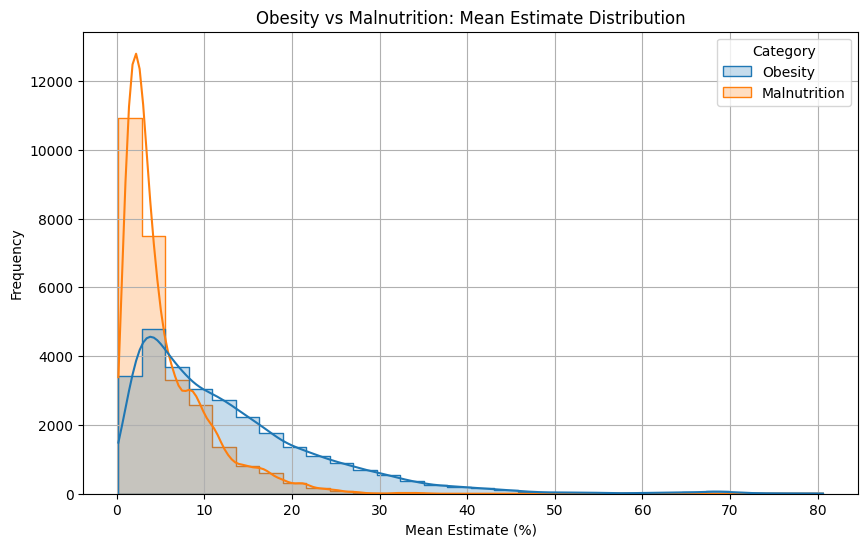

In [32]:
# Histogram: Mean_Estimate Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Mean_Estimate', hue='Category', kde=True, bins=30, element='step')
plt.title('Obesity vs Malnutrition: Mean Estimate Distribution')
plt.xlabel('Mean Estimate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

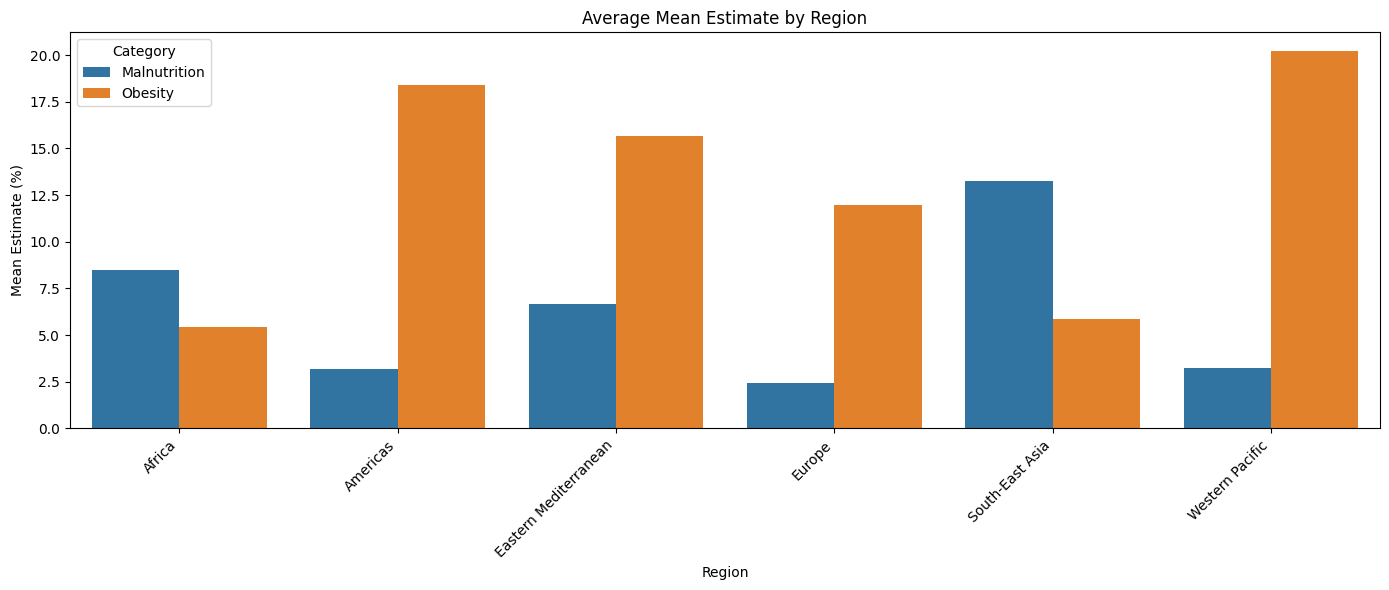

In [33]:
# Compare by Region: Bar Plot

region_avg = df_combined.groupby(['Region', 'Category'])['Mean_Estimate'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=region_avg, x='Region', y='Mean_Estimate', hue='Category')
plt.title('Average Mean Estimate by Region')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Estimate (%)')
plt.tight_layout()
plt.show()

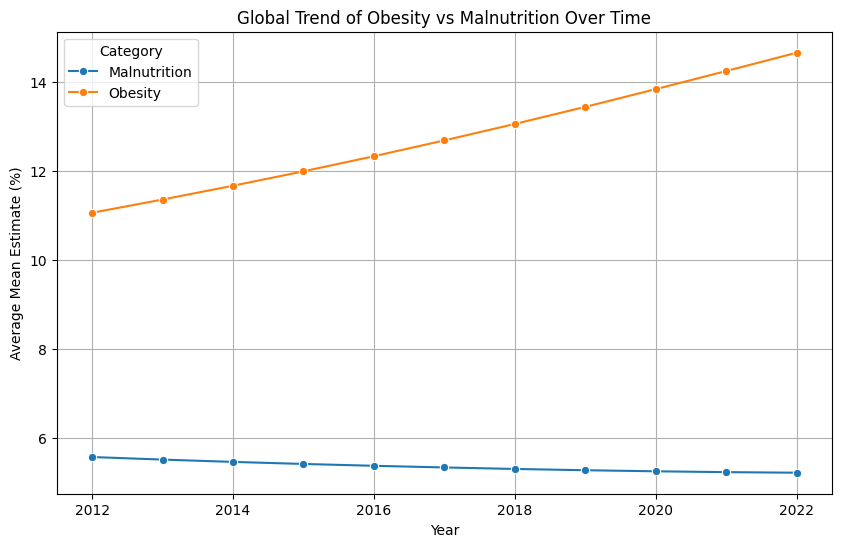

In [34]:
# Average trends by year and category
trend_df = df_combined.groupby(['Year', 'Category'])['Mean_Estimate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='Year', y='Mean_Estimate', hue='Category', marker='o')
plt.title('Global Trend of Obesity vs Malnutrition Over Time')
plt.ylabel('Average Mean Estimate (%)')
plt.grid(True)
plt.show()

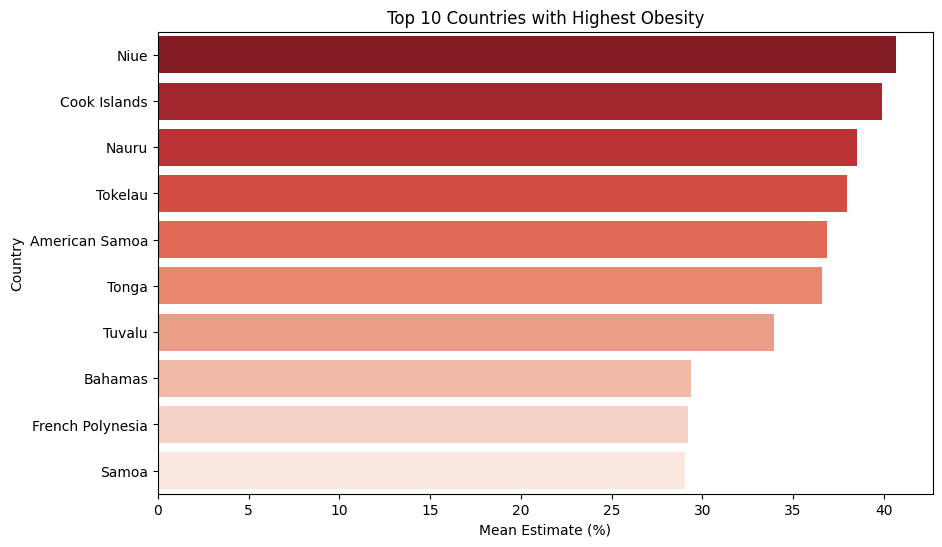

In [35]:
# Bar Chart: Top 10 Countries with Highest Obesity
# Top 10 Obesity
top_obesity = df_obesity_filtered.groupby('Country')['Mean_Estimate'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_obesity, y='Country', x='Mean_Estimate', hue='Country', palette='Reds_r')
plt.title('Top 10 Countries with Highest Obesity')
plt.xlabel('Mean Estimate (%)')
plt.show()

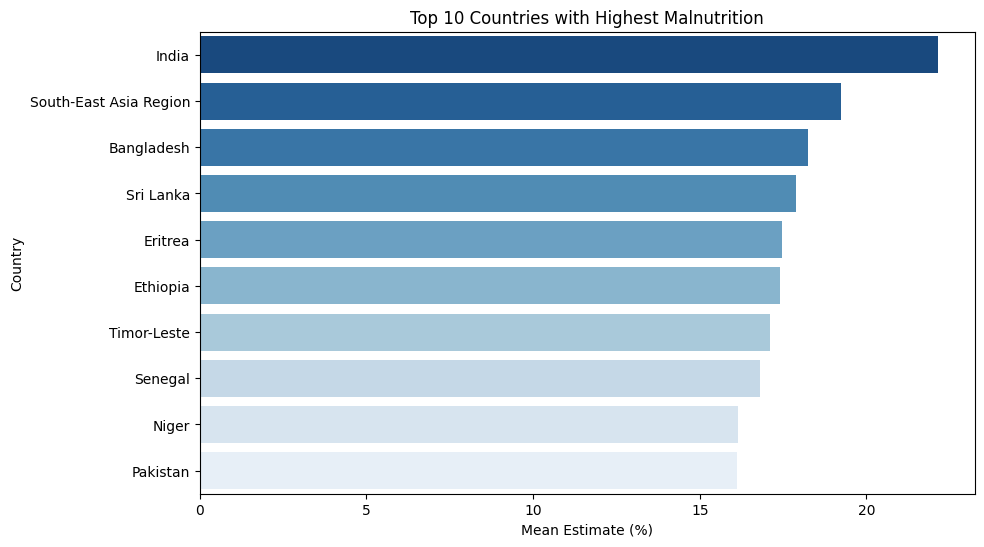

In [36]:
# Bar Chart: Top 10 Countries with Highest Malnutrition
# Top 10 Malnutrition
top_malnutrition = df_malnutrition_filtered.groupby('Country')['Mean_Estimate'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_malnutrition, y='Country', x='Mean_Estimate', hue='Country', palette='Blues_r')
plt.title('Top 10 Countries with Highest Malnutrition')
plt.xlabel('Mean Estimate (%)')
plt.show()

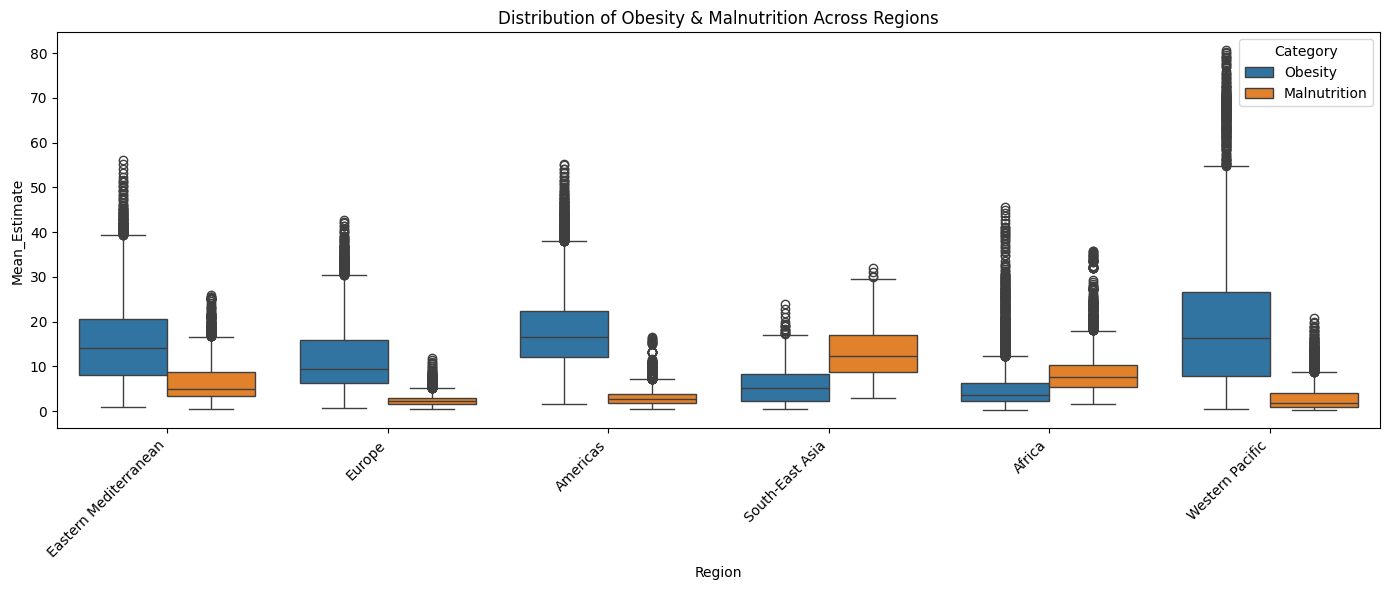

In [37]:
# Box Plot: Variability by Region
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_combined, x='Region', y='Mean_Estimate', hue='Category')
plt.title('Distribution of Obesity & Malnutrition Across Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

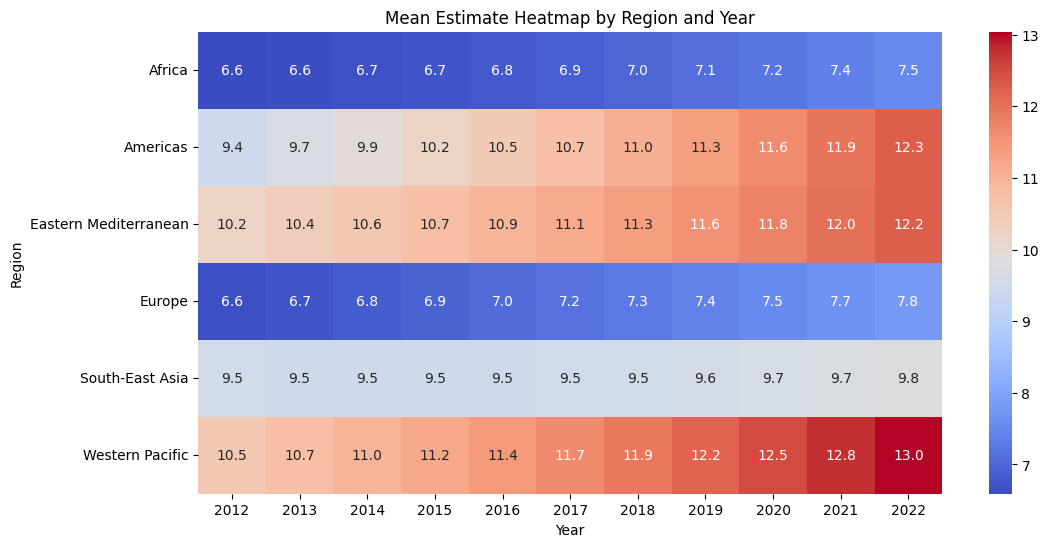

In [38]:
# Heatmap: Mean Estimate by Region and Year
# Pivot the data for heatmap
heat_df = df_combined.pivot_table(values='Mean_Estimate', index='Region', columns='Year', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heat_df, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Mean Estimate Heatmap by Region and Year')
plt.show()

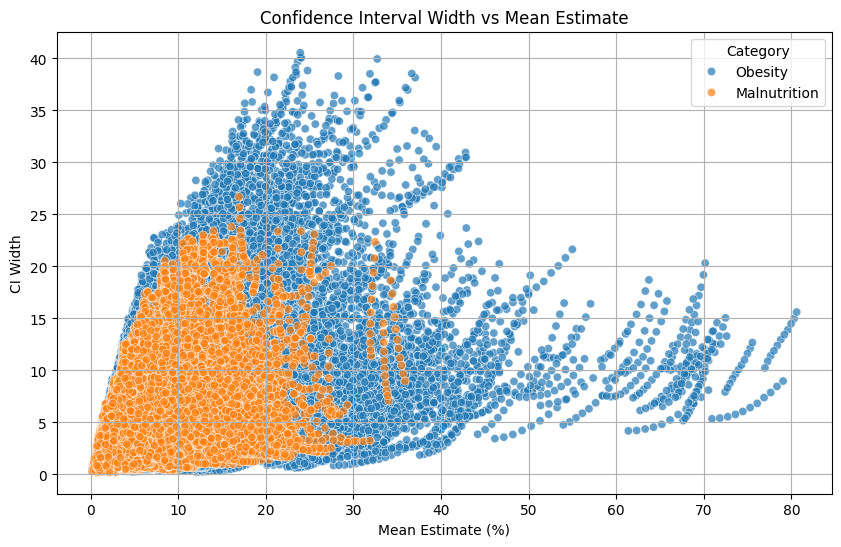

In [39]:
# Scatter Plot: CI Width vs Mean Estimate (Outlier Detection)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='Mean_Estimate', y='CI_Width', hue='Category', alpha=0.7)
plt.title('Confidence Interval Width vs Mean Estimate')
plt.xlabel('Mean Estimate (%)')
plt.ylabel('CI Width')
plt.grid(True)
plt.show()

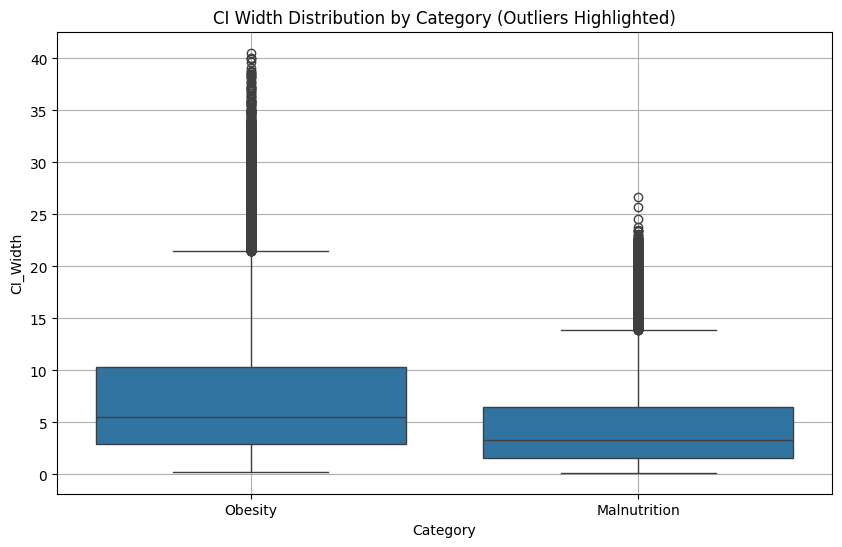

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined, x='Category', y='CI_Width', showfliers=True)
plt.title('CI Width Distribution by Category (Outliers Highlighted)')
plt.grid(True)
plt.show()

In [41]:
df_obesity_filtered['Country'].nunique()

210

In [42]:
df_malnutrition_filtered['Country'].nunique()

210

In [43]:
sorted(df_obesity_filtered['Country'].unique())

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Americas Region',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia, Plurinational State of',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo, The Democratic Republic of the',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Eastern Mediterranean Region',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'Fiji',
 'Finland',
 'France

In [44]:
missing_region_rows = df_obesity_filtered[df_obesity_filtered['Region'].isnull()]
print(missing_region_rows[['Country', 'Region']])

                            Country Region
152          Western Pacific Region   None
164                     High Income   None
248             Low & Middle Income   None
349          South-East Asia Region   None
682                 Americas Region   None
...                             ...    ...
82753                    Low Income   None
82789                        Europe   None
82807        South-East Asia Region   None
82834  Eastern Mediterranean Region   None
83093                   High Income   None

[1452 rows x 2 columns]


In [45]:
missing_country_counts = missing_region_rows['Country'].value_counts()
print(missing_country_counts)

Country
Western Pacific Region          132
High Income                     132
Low & Middle Income             132
South-East Asia Region          132
Americas Region                 132
Low Income                      132
Global                          132
Eastern Mediterranean Region    132
Upper Middle Income             132
Europe                          132
Africa                          132
Name: count, dtype: int64


In [ ]:
# Check for number of unique regions
df_obesity_filtered['Region'].nunique()

6

In [ ]:
# Check unique regions
df_obesity_filtered['Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Americas', 'South-East Asia',
       'Africa', 'Western Pacific', None], dtype=object)

In [48]:
# Mapping for Aggregated/Grouped Entries
grouped_entries_to_region = {
    'Africa': 'African Region',
    'Eastern Mediterranean Region': 'Eastern Mediterranean Region',
    'Europe': 'European Region',
    'South-East Asia Region': 'South-East Asia Region',
    'Western Pacific Region': 'Western Pacific Region',
    'Americas Region': 'Region of the Americas',
    'Global': 'Global',
    'High Income': 'Global - High Income',
    'Low Income': 'Global - Low Income',
    'Low & Middle Income': 'Global - Low & Middle Income',
    'Upper Middle Income': 'Global - Upper Middle Income'
}

In [49]:
# Fill in the Region based on the name in the Country column, specifically for aggregated/non-country rows
df_obesity_filtered['Region'] = df_obesity_filtered.apply(
    lambda row: grouped_entries_to_region.get(row['Country'], row['Region']),
    axis=1
)

df_malnutrition_filtered['Region'] = df_malnutrition_filtered.apply(
    lambda row: grouped_entries_to_region.get(row['Country'], row['Region']),
    axis=1
)

In [50]:
# Check for any remaining null values in the region column
df_obesity_filtered['Region'].isnull().sum()
df_malnutrition_filtered['Region'].isnull().sum()

np.int64(0)

In [51]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Copy original filtered data frames to avoid modifying them directly
df_obesity_filtered = df_obesity_filtered.copy()
df_malnutrition_filtered = df_malnutrition_filtered.copy()

# Handle outliers for each separately
df_obesity_clean = remove_outliers_iqr(df_obesity_filtered, 'CI_Width')
df_malnutrition_clean = remove_outliers_iqr(df_malnutrition_filtered, 'CI_Width')

# Combine the cleaned datasets
df_combined_clean = pd.concat([df_obesity_clean, df_malnutrition_clean], ignore_index=True)

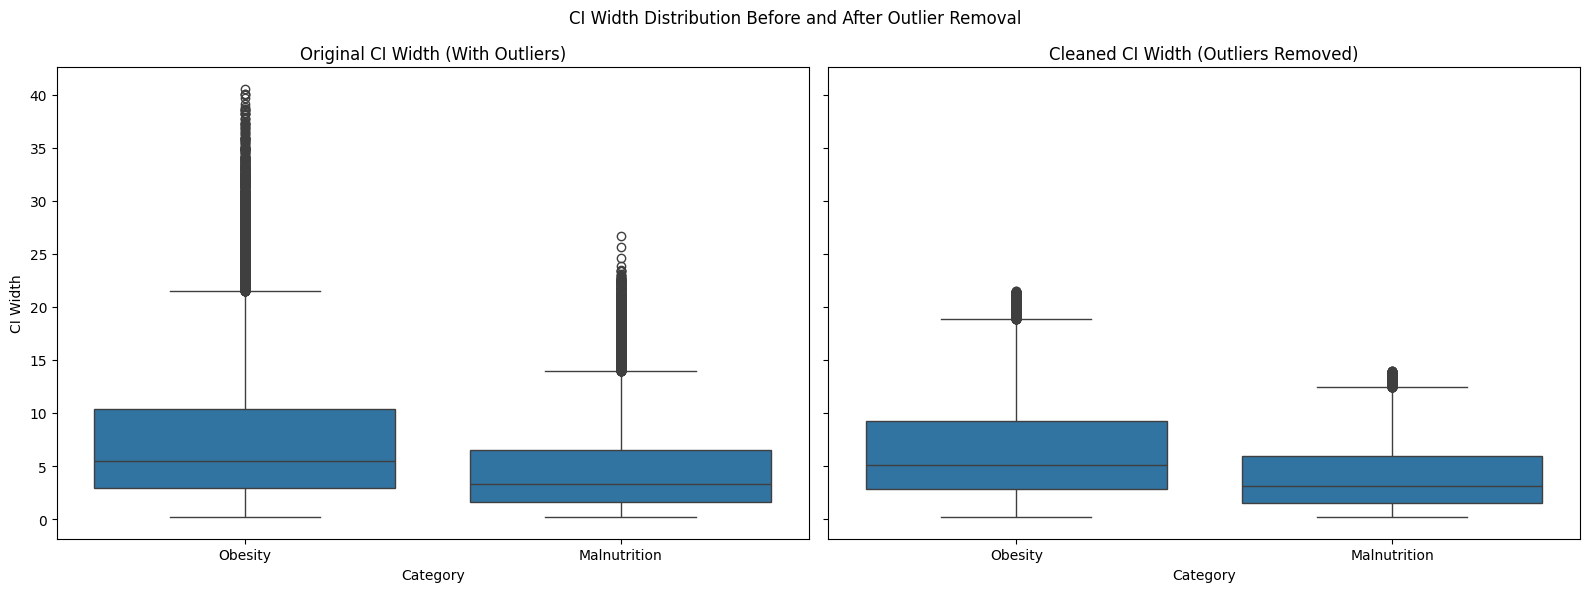

In [52]:
# Boxplot Comparison: Original vs Cleaned
# Combine original datasets
df_combined_original = pd.concat([df_obesity_filtered, df_malnutrition_filtered], ignore_index=True)

# BOX PLOT: Original vs Cleaned CI Width Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Original Data
sns.boxplot(data=df_combined_original, x='Category', y='CI_Width', ax=axes[0])
axes[0].set_title('Original CI Width (With Outliers)')
axes[0].set_ylabel('CI Width')

# Cleaned Data
sns.boxplot(data=df_combined_clean, x='Category', y='CI_Width', ax=axes[1])
axes[1].set_title('Cleaned CI Width (Outliers Removed)')
axes[1].set_ylabel('')

plt.suptitle('CI Width Distribution Before and After Outlier Removal')
plt.tight_layout()
plt.show()

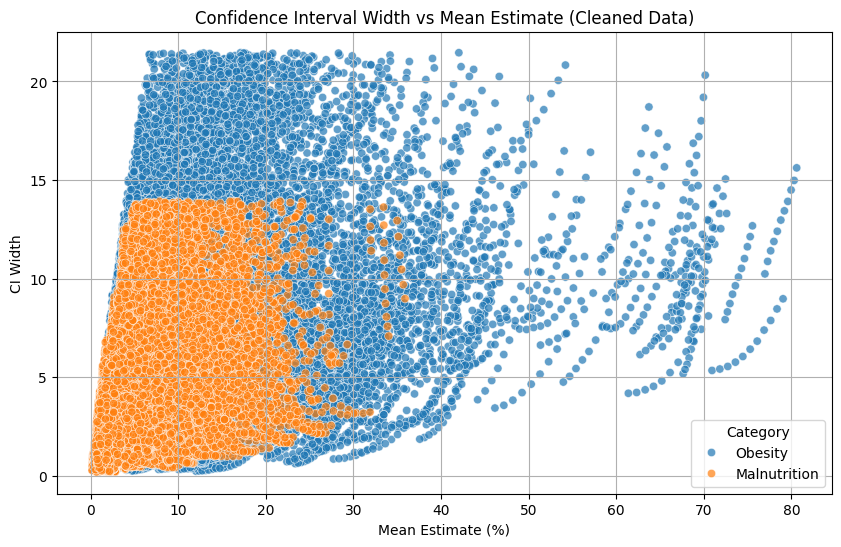

In [53]:
# SCATTER PLOT: Cleaned Data (CI Width vs Mean Estimate)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined_clean, x='Mean_Estimate', y='CI_Width', hue='Category', alpha=0.7)
plt.title('Confidence Interval Width vs Mean Estimate (Cleaned Data)')
plt.xlabel('Mean Estimate (%)')
plt.ylabel('CI Width')
plt.grid(True)
plt.show()

In [ ]:
# Check for any remaining null values in the region column after cleaning
df_obesity_clean['Region'].isnull().sum()
df_malnutrition_clean['Region'].isnull().sum()

np.int64(0)

In [55]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Connect to MySQL

import pymysql

connection = pymysql.connect(
    host = "localhost",             # your MySQL server host
    user = "root",                  # your MySQL username
    password = "paul",              # your MySQL password
    database = "nutrition_paradox"  # pre-created database
)

cursor = connection.cursor()

In [57]:
# Create tables for obesity and malnutrition datasets

cursor.execute("DROP TABLE IF EXISTS obesity")
cursor.execute("""CREATE TABLE obesity 
(
Year INT,
Gender VARCHAR(20),
Mean_Estimate FLOAT,
LowerBound FLOAT,
UpperBound FLOAT,
age_group VARCHAR(30),
Country VARCHAR(100),
Region VARCHAR(100),
CI_Width FLOAT,
Obesity_Level VARCHAR(20)
)""")

cursor.execute("DROP TABLE IF EXISTS malnutrition")
cursor.execute("""CREATE TABLE malnutrition 
(
Year INT,
Gender VARCHAR(20),
Mean_Estimate FLOAT,
LowerBound FLOAT,
UpperBound FLOAT,
age_group VARCHAR(30),
Country VARCHAR(100),
Region VARCHAR(100),
CI_Width FLOAT,
Malnutrition_Level VARCHAR(20)
)""")

cursor.execute("DROP TABLE IF EXISTS obesity_full")
cursor.execute("""
CREATE TABLE obesity_full (
    Year INT,
    Gender VARCHAR(20),
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    age_group VARCHAR(30),
    Country VARCHAR(100),
    Region VARCHAR(100),
    CI_Width FLOAT,
    Obesity_Level VARCHAR(20)
)
""")

cursor.execute("DROP TABLE IF EXISTS malnutrition_full")
cursor.execute("""
CREATE TABLE malnutrition_full (
    Year INT,
    Gender VARCHAR(20),
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    age_group VARCHAR(30),
    Country VARCHAR(100),
    Region VARCHAR(100),
    CI_Width FLOAT,
    Malnutrition_Level VARCHAR(20)
)
""")


connection.commit()
cursor.close()
connection.close()

In [58]:
import pymysql

# 1. Establish MySQL connection
connection = pymysql.connect(
    host = "localhost",             # your MySQL server host
    user = "root",                  # your MySQL username
    password = "paul",              # your MySQL password
    database = "nutrition_paradox"  # pre-created database
)

cursor = connection.cursor()

# 2. Insert into `obesity` (cleaned data)
for _, row in df_obesity_clean.iterrows():
    cursor.execute("""
        INSERT INTO obesity (Year, Gender, Mean_Estimate, LowerBound, UpperBound, age_group, Country, Region, CI_Width, obesity_level)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Year'], row['Gender'], row['Mean_Estimate'], row['LowerBound'], row['UpperBound'],
        row['age_group'], row['Country'], row['Region'], row['CI_Width'], row['obesity_level']
    ))

# 3. Insert into `obesity_full` (raw data)
for _, row in df_obesity_filtered.iterrows():
    cursor.execute("""
        INSERT INTO obesity_full (Year, Gender, Mean_Estimate, LowerBound, UpperBound, age_group, Country, Region, CI_Width, obesity_level)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Year'], row['Gender'], row['Mean_Estimate'], row['LowerBound'], row['UpperBound'],
        row['age_group'], row['Country'], row['Region'], row['CI_Width'], row['obesity_level']
    ))

# 4. Insert into `malnutrition` (cleaned data)
for _, row in df_malnutrition_clean.iterrows():
    cursor.execute("""
        INSERT INTO malnutrition (Year, Gender, Mean_Estimate, LowerBound, UpperBound, age_group, Country, Region, CI_Width, malnutrition_level)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Year'], row['Gender'], row['Mean_Estimate'], row['LowerBound'], row['UpperBound'],
        row['age_group'], row['Country'], row['Region'], row['CI_Width'], row['malnutrition_level']
    ))

# 5. Insert into `malnutrition_full` (raw data)
for _, row in df_malnutrition_filtered.iterrows():
    cursor.execute("""
        INSERT INTO malnutrition_full (Year, Gender, Mean_Estimate, LowerBound, UpperBound, age_group, Country, Region, CI_Width, malnutrition_level)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Year'], row['Gender'], row['Mean_Estimate'], row['LowerBound'], row['UpperBound'],
        row['age_group'], row['Country'], row['Region'], row['CI_Width'], row['malnutrition_level']
    ))

# 6. Finalize
connection.commit()
cursor.close()
connection.close()

print("Data successfully inserted into all 4 tables.")


Data successfully inserted into all 4 tables.
